In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def count_inconsistency(ary):
    cnt = 0
    last = ary[0]
    for i in ary[1:]:
        if i > last + 1e-05:
            cnt += 1
        last = i
    return cnt


def read_labels_from_log(path):
    with open(path, 'r') as f:
        cont = f.read()
    return np.array(cont.split(',')).astype(int)

In [3]:
import pandas as pd

morph_test_path = 'morph2_test.csv'

morph_test_labels = pd.read_csv(morph_test_path, usecols=['age']).values.reshape(-1)

inconsistency 0  label 4
inconsistency 2  label 27
inconsistency 0  label 9
inconsistency 2  label 27
inconsistency 0  label 15
inconsistency 2  label 27
inconsistency 0  label 32
inconsistency 3  label 27


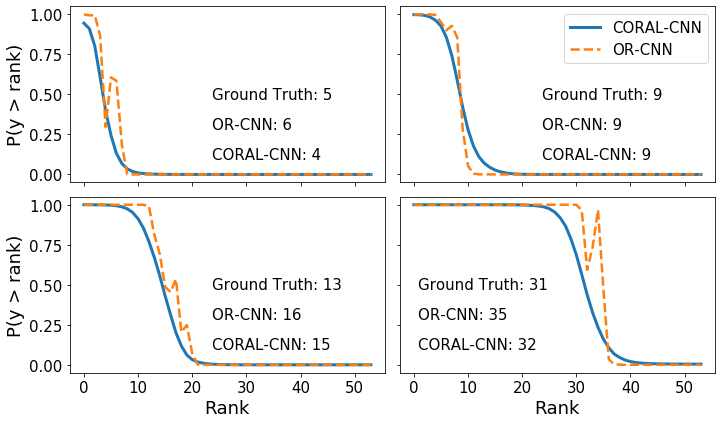

In [4]:
morph_ordinal_path = '.'

fig = plt.figure(figsize=(10, 6))

for j, i in enumerate([745, 133, 32, 36]):
        
    ax = fig.add_subplot(2, 2, j+1)
    
    #plt.plot([morph_test_labels[i]]*2, [0, 1], color='g', ls=':', lw=2, label='GT')


    test_proba_path_seed = os.path.join(
        morph_ordinal_path, f'morph-coral__seed0/test_allprobas.tensor')
    t = torch.load(test_proba_path_seed)


    print('inconsistency', count_inconsistency(t[i]), end='  ')
    test_proba_path = os.path.join(
        morph_ordinal_path, f'morph-coral__seed0/test_predictions.log')
    our_lab = read_labels_from_log(test_proba_path)  
    print('label', our_lab[i])


    plt.plot(range(t[5].size()[0]), t[i].numpy(), lw=3, label='CORAL-CNN')


    test_proba_path_seed = os.path.join(
        morph_ordinal_path,
        f'morph-ordinal__seed0/test_allprobas.tensor')
    t = torch.load(test_proba_path_seed)

    print('inconsistency', count_inconsistency(t[i]), end='  ')
    test_proba_path = os.path.join(
        morph_ordinal_path,
        f'morph-ordinal__seed0/test_predictions.log')
    lab = read_labels_from_log(test_proba_path)  
    print('label', lab[5])
    
    plt.plot(range(t[3].size()[0]), t[i].numpy(), lw=2.5, ls='--', label='OR-CNN')

    if j in [0, 2]:
        ax.set_ylabel('P(y > rank)', size=18)
    if j in [2, 3]:
        ax.set_xlabel('Rank', size=18)
        
    if j in [0, 1]:
        ax.set_xticklabels([])
    if j in [1, 3]:
        ax.set_yticklabels([])
        
    ax.tick_params(axis='both', labelsize=15)
    
    if j in [0, 1]:
        x_text = 0.45
    elif j == 2:
        x_test = 0.55
    else:
        x_text = 0.06
    ax.text(x_text, 0.5, 'Ground Truth: {}'.format(morph_test_labels[i]), size=15,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    
    ax.text(x_text, 0.33, 'OR-CNN: {}'.format(lab[i]), size=15,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    
    ax.text(x_text, 0.16, 'CORAL-CNN: {}'.format(our_lab[i]), size=15,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    
    
    
    if j == 1:
        ax.legend(fontsize=15)
    #              bbox_to_anchor=(0.1, 1.05, 2.0, 0.2),
    #              ncol=3, fancybox=True, shadow=True)
    

plt.tight_layout()
plt.savefig('inconsistency-examplez.pdf')